In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
# add every font at the specified location
font_dir = ['./fonts']
for font in mpl.font_manager.findSystemFonts(fontpaths=font_dir):
    print(mpl.font_manager.FontProperties(fname=font).get_name())
    mpl.font_manager.fontManager.addfont(font)

Noto Sans KR
Black Han Sans
NanumMyeongjo
Noto Sans KR
Noto Serif KR
Noto Sans KR
NanumGothic
Noto Serif KR
Noto Sans KR
Noto Sans KR
NanumGothic
Noto Serif KR
Noto Sans KR
Noto Serif KR
Noto Sans KR
Noto Sans KR
Noto Sans KR
Noto Sans KR
Noto Sans KR
NanumMyeongjo
NanumGothic
NanumMyeongjo
Noto Serif KR
Noto Sans KR
Noto Serif KR
Noto Serif KR


In [3]:
# Set font family globally
mpl.rcParams['font.family'] = 'Noto Sans KR'
print(mpl.rcParams['font.family'])

['Noto Sans KR']


In [4]:
# 유니코드에서 음수 부호 설정
mpl.rc('axes', unicode_minus=False)

In [5]:
survey_raw_df=pd.read_csv('datas/survey_results_public.csv', index_col='ResponseId')
survey_raw_df

,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,I am a developer by profession,"Employed, full-time",Fully remote,Freelance/contract work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,Udemy,8,5,...,30-60 minutes a day,Less than 15 minutes a day,Just right,DevOps function;Microservices;Developer portal...,Yes,Yes,Yes,Too long,Easy,NaN
73265,I am a developer by profession,"Employed, full-time",Full in-person,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,Coursera;Udemy;Udacity,6,5,...,15-30 minutes a day,60-120 minutes a day,Very long,None of these,No,Yes,Yes,Too long,Easy,NaN
73266,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Programming Games;Stac...,Udemy;Codecademy;Pluralsight;edX,42,33,...,30-60 minutes a day,60-120 minutes a day,Just right,None of these,No,No,No,Appropriate in length,Easy,NaN


In [6]:
schema_raw=pd.read_csv('datas/survey_results_schema.csv', index_col='qname')['question']
schema_raw

qname
S0             <div><span style="font-size:19px;"><strong>Hel...
MetaInfo                                       Browser Meta Info
S1             <span style="font-size:22px; font-family: aria...
MainBranch     Which of the following options best describes ...
Employment     Which of the following best describes your cur...
                                     ...                        
Frequency_2    Interacting with people outside of your immedi...
Frequency_3    Encountering knowledge silos (where one indivi...
TrueFalse_1    Are you involved in supporting new hires durin...
TrueFalse_2    Do you use learning resources provided by your...
TrueFalse_3    Does your employer give you time to learn new ...
Name: question, Length: 79, dtype: object

In [7]:
survey_raw_df.columns

Index(['MainBranch', 'Employment', 'RemoteWork', 'CodingActivities', 'EdLevel',
       'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool',
       'Country', 'Currency', 'CompTotal', 'CompFreq',
       'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith',
       'OpSysProfessional use', 'OpSysPersonal use', 'VersionControlSystem',
       'VCInteraction', 'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWorkedWith', 'OfficeStack

In [8]:
schema_raw.index

Index(['S0', 'MetaInfo', 'S1', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'S2', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'S3', 'Language', 'Database', 'Platform',
       'Webframe', 'MiscTech', 'ToolsTech', 'NEWCollabTools', 'OpSys',
       'VersionControlSystem', 'VCInteraction', 'VCHosting',
       'OfficeStackAsync', 'OfficeStackSync', 'Blockchain', 'S4', 'NEWSOSites',
       'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOComm', 'S5', 'Age',
       'Gender', 'Trans', 'Sexuality', 'Ethnicity', 'Accessibility',
       'MentalHealth', 'S6', 'TBranch', 'ICorPM', 'WorkExp', 'Knowledge',
       'Frequency', 'TimeSearching', 'TimeAnswering', 'Onboarding',
       'ProfessionalTech', 'SOTeamsUsage', 'TrueFalse', 'S7', 'SurveyLength',
       'SurveyEase', 'Knowledge_1', 'Knowledge_2', 'Knowl

In [9]:
schema_raw['CompTotal']

'What is your current total compensation (salary, bonuses, and perks, before taxes and deductions)? Please enter a whole number in the box below, without any punctuation.  If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty.'

In [10]:
schema_raw['CompFreq']

'Is that compensation weekly, monthly, or yearly?'

In [11]:
survey_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73268 entries, 1 to 73268
Data columns (total 78 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MainBranch                      73268 non-null  object 
 1   Employment                      71709 non-null  object 
 2   RemoteWork                      58958 non-null  object 
 3   CodingActivities                58899 non-null  object 
 4   EdLevel                         71571 non-null  object 
 5   LearnCode                       71580 non-null  object 
 6   LearnCodeOnline                 50685 non-null  object 
 7   LearnCodeCoursesCert            29389 non-null  object 
 8   YearsCode                       71331 non-null  object 
 9   YearsCodePro                    51833 non-null  object 
 10  DevType                         61302 non-null  object 
 11  OrgSize                         51039 non-null  object 
 12  PurchaseInfluence               

In [12]:
# column 개수가 많을 때 한 번에 보고 싶은 양 설정
pd.set_option('display.max_columns', 78)

In [13]:
# rows 개수가 많을 때 한 번에 보고 싶은 양 설정
pd.set_option('display.max_rows', 78)

In [14]:
survey_raw_df

,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysProfessional use,OpSysPersonal use,VersionControlSystem,VCInteraction,VCHostingPersonal use,VCHostingProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,Blockchain,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada,CAD\tCanadian dollar,NaN,NaN,JavaScript;TypeScript,Rust;TypeScript,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,macOS,Windows Subsystem for Linux (WSL),Git,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very unfavorable,Collectives on Stack Overflow;Stack Overflow f...,Daily or almost daily,Yes,Daily or almost daily,Not sure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,5,Data scientist or machine learning specialist;...,20 to 99 employees,I have some influence,NaN,United Kingdom of Great Britain and Northern I...,GBP\tPound sterling,32000.0,Yearly,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,Angular.js,Angular;Angular.js,Pandas,.NET,NaN,NaN,Notepad++;Visual Studio,Notepad++;Visual Studio,Windows,Windows,Git,Code editor,NaN,NaN,NaN,NaN,Microsoft Teams,Microsoft Teams,Very unfavorable,Collectives on Stack Overflow;Stack Overflow;S...,Multiple times per day,Yes,Multiple times per day,Neutral,25-34 years old,Man,No,Bisexual,White,None of the above,"I have a mood or emotional disorder (e.g., dep...",No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,17,"Developer, full-stack",100 to 499 employees,I have some influence,Other (please specify):,Israel,ILS\tIsraeli new shekel,60000.0,Monthly,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,ASP.NET;ASP.NET Core,ASP.NET;ASP.NET Core,.NET,.NET,NaN,NaN,Notepad++;Visual Studio;Visual Studio Code,Notepad++;Visual Studio;Visual Studio Code,Windows,Windows,Git,Code editor;Command-line;Version control hosti...,NaN,

In [15]:
selected_columns = [
    #인구 통계
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    #프로그램 경험
    'YearsCode',
    'YearsCodePro',
    'LanguageHaveWorkedWith',
    'LanguageWantToWorkWith',
    'LearnCodeCoursesCert',
    'ProfessionalTech',
    'SOAccount',
    #고용 관리 정보
    'Employment',
    'DevType',
    'WorkExp'
]

In [16]:
survey_df = survey_raw_df[selected_columns].copy()
survey_df

,Country,Age,Gender,EdLevel,YearsCode,YearsCodePro,LanguageHaveWorkedWith,LanguageWantToWorkWith,LearnCodeCoursesCert,ProfessionalTech,SOAccount,Employment,DevType,WorkExp
ResponseId,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Canada,NaN,NaN,NaN,NaN,NaN,JavaScript;TypeScript,Rust;TypeScript,NaN,NaN,Yes,"Employed, full-time",NaN,NaN
3,United Kingdom of Great Britain and Northern I...,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14,5,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,NaN,NaN,Yes,"Employed, full-time",Data scientist or machine learning specialist;...,NaN
4,Israel,35-44 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20,17,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,NaN,NaN,Yes,"Employed, full-time","Developer, full-stack",NaN
5,United States of America,25-34 years old,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,3,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,C#;Elixir;F#;Go;JavaScript;Rust;TypeScript,NaN,NaN,Yes,"Employed, full-time","Developer, front-end;Developer, full-stack;Dev...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,Nigeria,25-34 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,5,Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...,Bash/Shell;Go;JavaScript;Python;SQL;TypeScript,Udemy,DevOps function;Microservices;Developer portal...,Yes,"Employed, full-time","Developer, back-end",5.0
73265,United States of America,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,5,Bash/Shell;HTML/CSS;JavaScript;Python;SQL,HTML/CSS;JavaScript;Python,Coursera;Udemy;Udacity,None of these,Not sure/can't remember,"Employed, full-time",Data scientist or machine learning specialist,6.0
73266,United States of America,55-64 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",42,33,HTML/CSS;JavaScript;PHP;Python;SQL,C#;HTML/CSS;JavaScript;PHP;Python;SQL,Udemy;Codecademy;Pluralsight;edX,None of these,Yes,"Employed, full-time","Developer, full-stack;Developer, desktop or en...",42.0


In [17]:
survey_df.Country.isnull().sum()

1497

In [18]:
def count_nan(series):
    return series.isnull().sum()

In [19]:
count_nan(survey_df['YearsCode'])

1937

In [20]:
survey_df['YearsCode'].replace('Less than 1 year',0, inplace=True)
survey_df['YearsCode'].replace('More than 50 years',51, inplace=True)
survey_df['YearsCode'] = survey_df['YearsCode'].astype(float)

In [21]:
survey_df['YearsCode'].unique()

array([nan, 14., 20.,  8., 15.,  3.,  1.,  6., 37.,  5., 12., 22., 11.,
        4.,  7., 13., 36.,  2., 25., 10., 40., 16., 27., 24., 19.,  9.,
       17., 18., 26., 51., 29., 30., 32.,  0., 48., 45., 38., 39., 28.,
       23., 43., 21., 41., 35., 50., 33., 31., 34., 46., 44., 42., 47.,
       49.])

In [22]:
schema_raw['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

In [23]:
count_nan(survey_df['YearsCodePro'])

21435

In [24]:
survey_df['YearsCodePro'].replace('Less than 1 year',0, inplace=True)
survey_df['YearsCodePro'].replace('More than 50 years',51, inplace=True)
survey_df['YearsCodePro'] = survey_df['YearsCode'].astype(float)

In [25]:
survey_df.describe()

,YearsCode,YearsCodePro,WorkExp
count,71331.000000,71331.000000,36769.000000
mean,12.251307,12.251307,10.242378
std,9.952419,9.952419,8.706850
min,0.000000,0.000000,0.000000
25%,5.000000,5.000000,4.000000
50%,9.000000,9.000000,8.000000
75%,16.000000,16.000000,15.000000
max,51.000000,51.000000,50.000000


In [26]:
survey_df2 = survey_raw_df[selected_columns].copy()

In [27]:
survey_df2['YearsCodePro'] = pd.to_numeric(survey_df2['YearsCodePro'], errors='coerce')
survey_df2['YearsCode'] = pd.to_numeric(survey_df2['YearsCode'], errors='coerce')

In [28]:
survey_df2['YearsCodePro']

ResponseId
1         NaN
2         NaN
3         5.0
4        17.0
5         3.0
         ... 
73264     5.0
73265     5.0
73266    33.0
73267    31.0
73268     5.0
Name: YearsCodePro, Length: 73268, dtype: float64

In [29]:
sns.set_style('darkgrid')
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.figsize'] = (9,5)
mpl.rcParams['figure.facecolor'] = '#191970' #nidnightblue
mpl.rcParams['axes.facecolor'] = 'white'

In [30]:
# matplotlib.pyplot에 style을 적용할 수 있는 것들에 대한 리스트를 조회할 수 있다
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [31]:
# use()매서드에 적용할 스타일 넣기. 원래 스타일로 돌아가려면 default를 쓰면 된다
plt.style.use('dark_background')

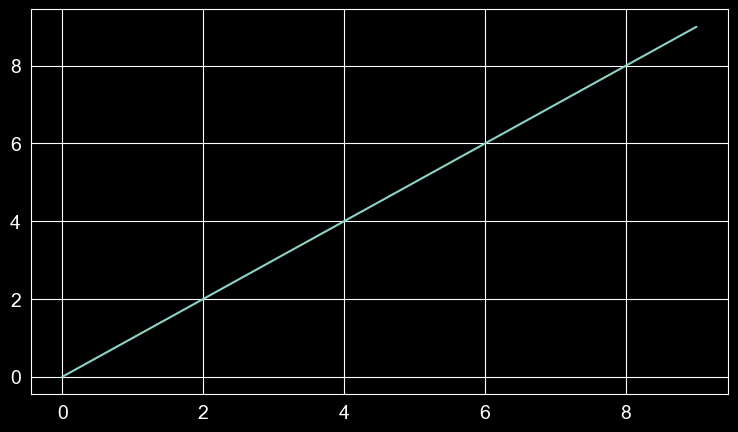

In [32]:
plt.plot(range(10))

In [33]:
survey_df['Country'].unique()

array([nan, 'Canada',
       'United Kingdom of Great Britain and Northern Ireland', 'Israel',
       'United States of America', 'Germany', 'India', 'Netherlands',
       'Croatia', 'Australia', 'Russian Federation', 'Czech Republic',
       'Austria', 'Serbia', 'Italy', 'Ireland', 'Poland', 'Slovenia',
       'Iraq', 'Sweden', 'Madagascar', 'Norway', 'Taiwan',
       'Hong Kong (S.A.R.)', 'Mexico', 'France', 'Brazil', 'Lithuania',
       'Uruguay', 'Denmark', 'Spain', 'Egypt', 'Turkey', 'South Africa',
       'Ukraine', 'Finland', 'Romania', 'Portugal', 'Singapore', 'Oman',
       'Belgium', 'Chile', 'Bulgaria', 'Latvia', 'Philippines', 'Greece',
       'Belarus', 'Saudi Arabia', 'Kenya', 'Switzerland', 'Iceland',
       'Viet Nam', 'Thailand', 'China', 'Montenegro', 'Slovakia', 'Japan',
       'Luxembourg', 'Turkmenistan', 'Argentina', 'Hungary', 'Tunisia',
       'Bangladesh', 'Maldives', 'Dominican Republic', 'Jordan',
       'Pakistan', 'Nepal', 'Iran, Islamic Republic of...', 'I

In [34]:
survey_df['Country'].nunique()

180

In [35]:
survey_df['Country'].value_counts().nlargest(15)

United States of America                                13543
India                                                    6639
Germany                                                  5395
United Kingdom of Great Britain and Northern Ireland     4190
Canada                                                   2490
France                                                   2328
Brazil                                                   2109
Poland                                                   1732
Netherlands                                              1555
Spain                                                    1521
Italy                                                    1514
Australia                                                1462
Russian Federation                                       1229
Turkey                                                   1020
Sweden                                                   1020
Name: Country, dtype: int64

In [36]:
data = survey_df['Country'].value_counts().nlargest(15)

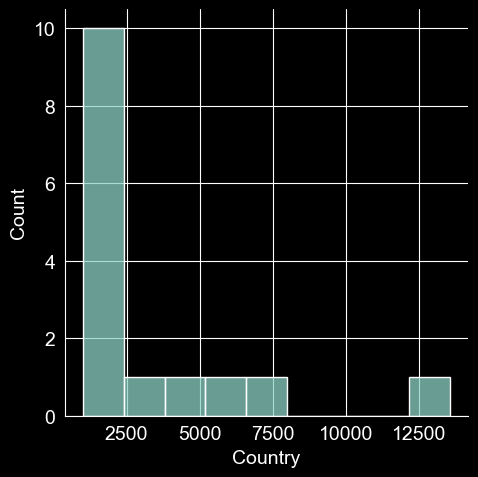

In [37]:
sns.displot(data=survey_df, x=data)

In [38]:
mpl.rcParams['font.family'] = 'Noto Sans KR'
print(mpl.rcParams['font.family'])

['Noto Sans KR']


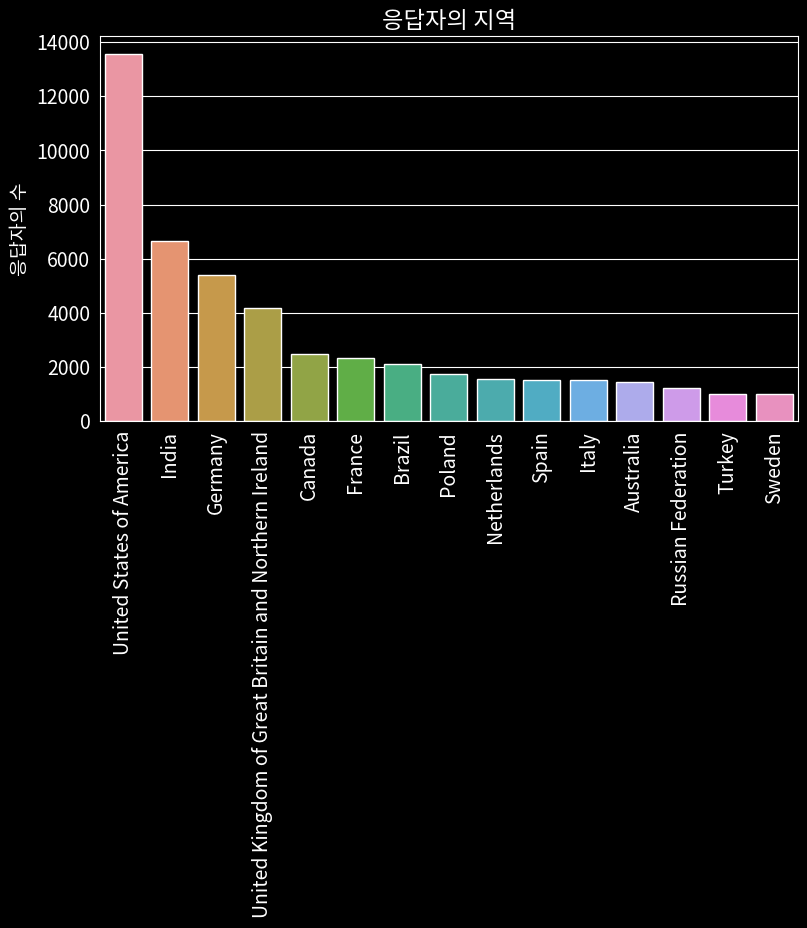

In [39]:
font_list = mpl.font_manager.findSystemFonts()

x = data.index
plt.title('응답자의 지역')
plt.xticks(rotation=90)
plt.ylabel('응답자의 수')
sns.barplot(x=x,y=data.values)

plt.show()

In [40]:
age_counts = survey_df['Age'].value_counts()
age_counts

25-34 years old       28112
18-24 years old       16646
35-44 years old       13988
45-54 years old        5281
Under 18 years old     3866
55-64 years old        1978
65 years or older       554
Prefer not to say       521
Name: Age, dtype: int64

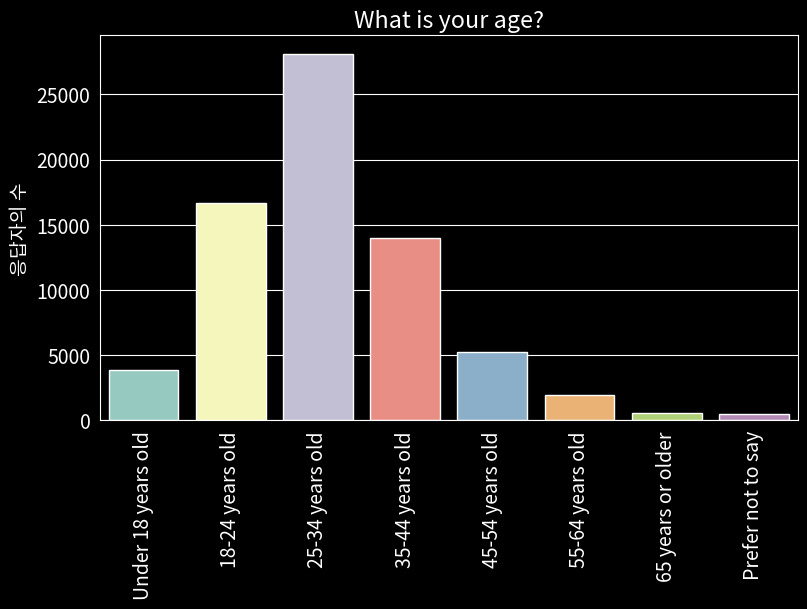

In [41]:
x = age_counts.index
x_order=['Under 18 years old','18-24 years old','25-34 years old','35-44 years old','45-54 years old','55-64 years old','65 years or older', 'Prefer not to say']

plt.title('What is your age?')
plt.xticks(rotation=90)
plt.ylabel('응답자의 수')
sns.barplot(x=x,y=age_counts.values, order=x_order)

plt.show()

In [42]:
age_counts.index

Index(['25-34 years old', '18-24 years old', '35-44 years old',
       '45-54 years old', 'Under 18 years old', '55-64 years old',
       '65 years or older', 'Prefer not to say'],
      dtype='object')

In [43]:
schema_raw.Gender

'Which of the following describe you, if any? Please check all that apply.'

In [44]:
gender_conuts = survey_df['Gender'].value_counts(True)

In [45]:
survey_df.where(~(survey_df["Gender"].str.contains(";", na=False)), np.nan, inplace=True)
survey_df["Gender"].value_counts()

Man                                                  64607
Woman                                                 3399
Prefer not to say                                     1172
Non-binary, genderqueer, or gender non-conforming      704
Or, in your own words:                                 279
Name: Gender, dtype: int64

In [46]:
gender_conuts

Man                                                                                   0.911846
Woman                                                                                 0.047973
Prefer not to say                                                                     0.016541
Non-binary, genderqueer, or gender non-conforming                                     0.009936
Or, in your own words:                                                                0.003938
Man;Non-binary, genderqueer, or gender non-conforming                                 0.003317
Man;Or, in your own words:                                                            0.002413
Woman;Non-binary, genderqueer, or gender non-conforming                               0.002258
Man;Woman;Non-binary, genderqueer, or gender non-conforming                           0.000438
Man;Woman                                                                             0.000339
Man;Or, in your own words:;Woman;Non-binary, gende

In [ ]:
labels=gender_conuts.index
explode = (-1, -5, 2, 2, -2)
colors =["yellowgreen", "gold", "lightskyblue", "lightcoral", "orange"]
fig, ax = plt.subplots()
ax.pie (gender_conuts, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=180)
ax.axis('equal')
plt.show()

In [48]:
schema_raw.EdLevel

'Which of the following best describes the highest level of formal education that you’ve completed? *'

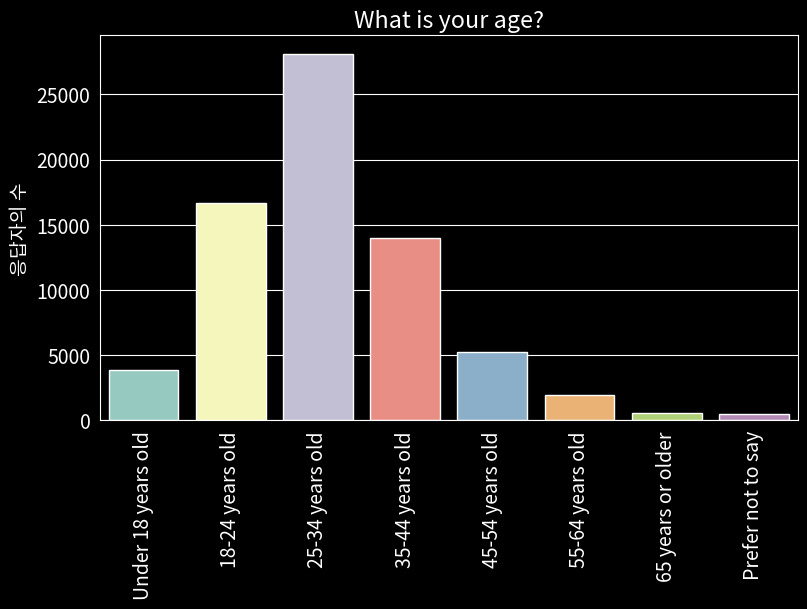

In [49]:
x = age_counts.index
x_order=['Under 18 years old','18-24 years old','25-34 years old','35-44 years old','45-54 years old','55-64 years old','65 years or older', 'Prefer not to say']

plt.title('What is your age?')
plt.xticks(rotation=90)
plt.ylabel('응답자의 수')
sns.barplot(x=x,y=age_counts.values, order=x_order)

plt.show()

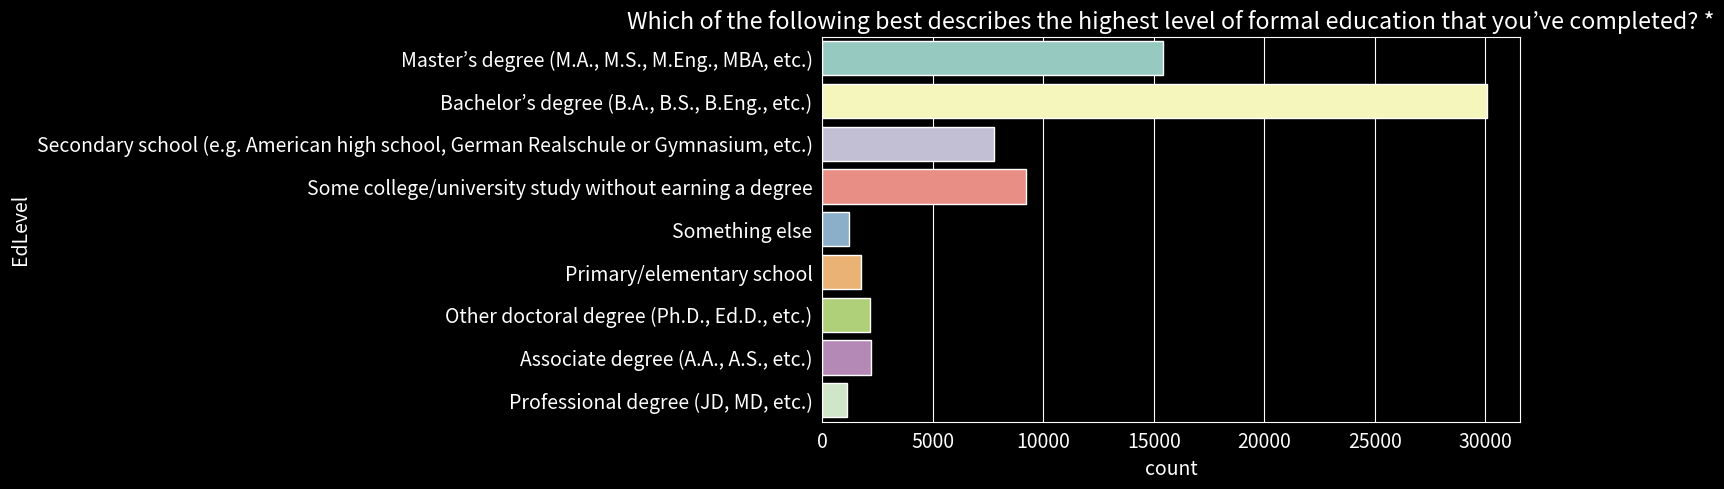

In [50]:
y = survey_df.EdLevel

plt.title(schema_raw.EdLevel)
plt.ylabel(None)
sns.countplot(data=survey_df, y=y)

plt.show()

In [52]:
list(survey_df.DevType)

[nan,
 nan,
 'Data scientist or machine learning specialist;Developer, front-end;Engineer, data;Engineer, site reliability',
 'Developer, full-stack',
 'Developer, front-end;Developer, full-stack;Developer, back-end;Developer, desktop or enterprise applications;Developer, QA or test',
 nan,
 nan,
 'Developer, full-stack;Student',
 'Developer, back-end',
 'Developer, desktop or enterprise applications;Developer, mobile;Educator',
 'Developer, full-stack;Developer, back-end',
 'Engineering manager',
 'Developer, full-stack',
 'Developer, front-end;Developer, full-stack;Developer, back-end;Database administrator',
 'Developer, full-stack;Academic researcher;DevOps specialist',
 'Developer, full-stack',
 'Developer, full-stack',
 'Engineer, data',
 'Developer, back-end;Developer, desktop or enterprise applications',
 nan,
 'Student',
 'Developer, full-stack',
 'Developer, back-end',
 'Other (please specify):',
 'Developer, full-stack',
 'Developer, back-end;Developer, mobile',
 'Developer,

In [64]:
# 강사님 코드

def split_multicolumn(col_series):
    result_df = pd.DataFrame(col_series)
    options = []
    for idx, value in col_series[col_series.notnull()].items():
        for option in value.split(';'):
            if option not in result_df.columns:
                options.append(option)
                result_df[option] = False
            result_df.at[idx, option] = True
    return result_df[options]

split_multicolumn(survey_df['DevType'])

,Data scientist or machine learning specialist,"Developer, front-end","Engineer, data","Engineer, site reliability","Developer, full-stack","Developer, back-end","Developer, desktop or enterprise applications","Developer, QA or test",Student,"Developer, mobile",Educator,Engineering manager,Database administrator,Academic researcher,DevOps specialist,Other (please specify):,"Developer, embedded applications or devices","Developer, game or graphics",Project manager,Cloud infrastructure engineer,Data or business analyst,Designer,Scientist,Product manager,"Senior Executive (C-Suite, VP, etc.)",System administrator,Blockchain,Marketing or sales professional,Security professional
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,True,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73265,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73266,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [58]:
# 기영 오빠 코드

def split_multicolumns(s):
    s.dropna(inplace=True) #결측치 제거
    df = pd.DataFrame(s) #데이터프레임화
    for x in s.str.split(';').items(): #인덱스와 ;를 기준으로 스플릿된 스트링 리스트 반환
        df.loc[x[0],x[1]]=True #해당 인덱스와 스트링 리스트의 요소인 칼럼에 대해 True값 설정
    df.fillna(False,inplace=True) #자동으로 NaN이 된 결측치 모두 False로 변환
    return df
    
split_multicolumns(survey_df.DevType)

,DevType,Data scientist or machine learning specialist,"Developer, front-end","Engineer, data","Engineer, site reliability","Developer, full-stack","Developer, back-end","Developer, desktop or enterprise applications","Developer, QA or test",Student,"Developer, mobile",Educator,Engineering manager,Database administrator,Academic researcher,DevOps specialist,Other (please specify):,"Developer, embedded applications or devices","Developer, game or graphics",Project manager,Cloud infrastructure engineer,Data or business analyst,Designer,Scientist,Product manager,"Senior Executive (C-Suite, VP, etc.)",System administrator,Blockchain,Marketing or sales professional,Security professional
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,Data scientist or machine learning specialist;...,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,"Developer, full-stack",False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,"Developer, front-end;Developer, full-stack;Dev...",False,True,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,"Developer, full-stack;Student",False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,"Developer, back-end",False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,"Developer, back-end",False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73265,Data scientist or machine learning specialist,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73266,"Developer, full-stack;Developer, desktop or en...",False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [65]:
a = split_multicolumn(survey_df['DevType'])
a.sum().sort_values(ascending=False)

Developer, full-stack                            28433
Developer, back-end                              26369
Developer, front-end                             15739
Developer, desktop or enterprise applications     9451
Developer, mobile                                 7566
DevOps specialist                                 6093
Student                                           5503
Cloud infrastructure engineer                     5215
Database administrator                            4872
System administrator                              4828
Developer, embedded applications or devices       3871
Project manager                                   3844
Designer                                          3712
Engineer, data                                    3558
Engineering manager                               3534
Data scientist or machine learning specialist     3377
Data or business analyst                          3166
Developer, QA or test                             3045
Academic r

In [71]:
amount = a.sum().sort_values(ascending=False)
total = amount.values.sum()
devtype_percentage = (amount/total)*100

In [74]:
devtype_percentage

Developer, full-stack                            17.462842
Developer, back-end                              16.195185
Developer, front-end                              9.666503
Developer, desktop or enterprise applications     5.804569
Developer, mobile                                 4.646849
DevOps specialist                                 3.742169
Student                                           3.379806
Cloud infrastructure engineer                     3.202923
Database administrator                            2.992261
System administrator                              2.965238
Developer, embedded applications or devices       2.377472
Project manager                                   2.360889
Designer                                          2.279818
Engineer, data                                    2.185235
Engineering manager                               2.170495
Data scientist or machine learning specialist     2.074070
Data or business analyst                          1.9444

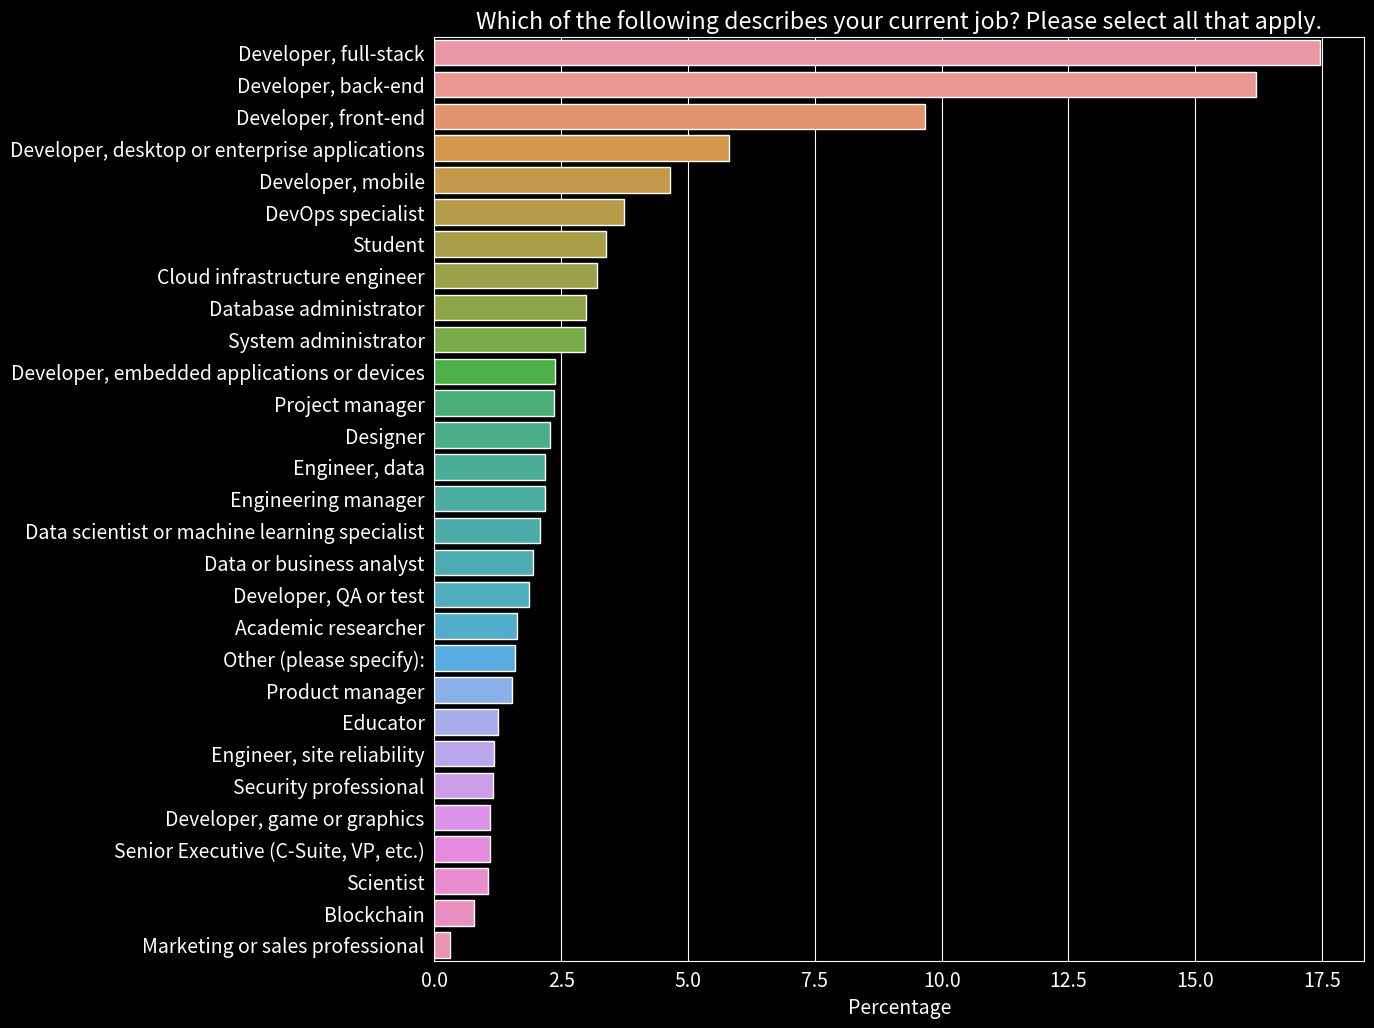

In [105]:
y = devtype_percentage.index

plt.figure(figsize=(12,12))
plt.title(schema_raw.DevType)  # 이거 쓰셔야되요 틀렸습니다
plt.ylabel(None)
plt.xlabel('Percentage')
sns.barplot(x=devtype_percentage, y=y)

plt.show()

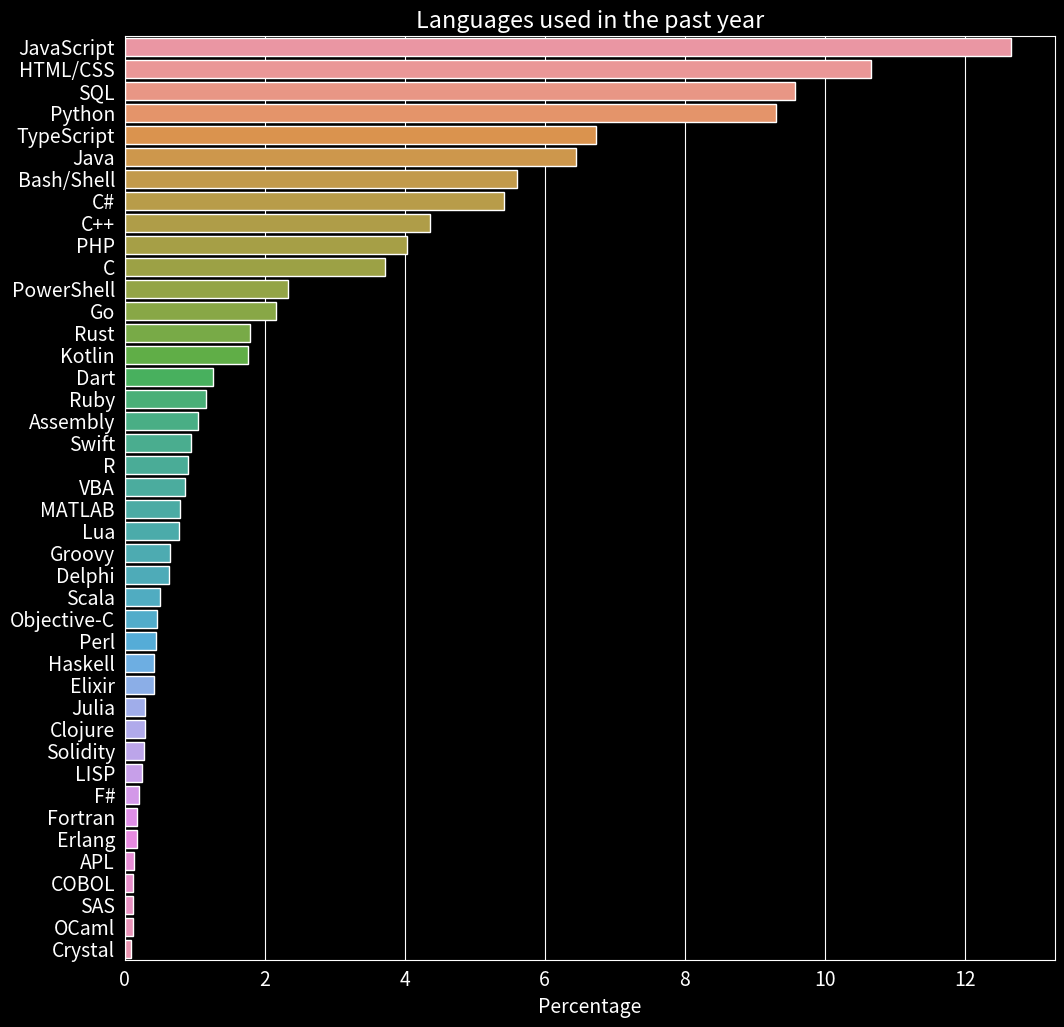

In [150]:
lan_df=split_multicolumn(survey_df['LanguageHaveWorkedWith'])
lan_df.sum().sort_values(ascending=False)

lan_amount = lan_df.sum().sort_values(ascending=False)
lan_total = lan_amount.values.sum()
lan_percentage = (lan_amount/lan_total)*100
lan_percentage

y = lan_percentage.index

plt.figure(figsize=(12,12))
plt.title('Languages used in the past year')  # 이거 쓰셔야되요 틀렸습니다
plt.ylabel(None)
plt.xlabel('Percentage')
sns.barplot(x=lan_percentage, y=y)

plt.show()

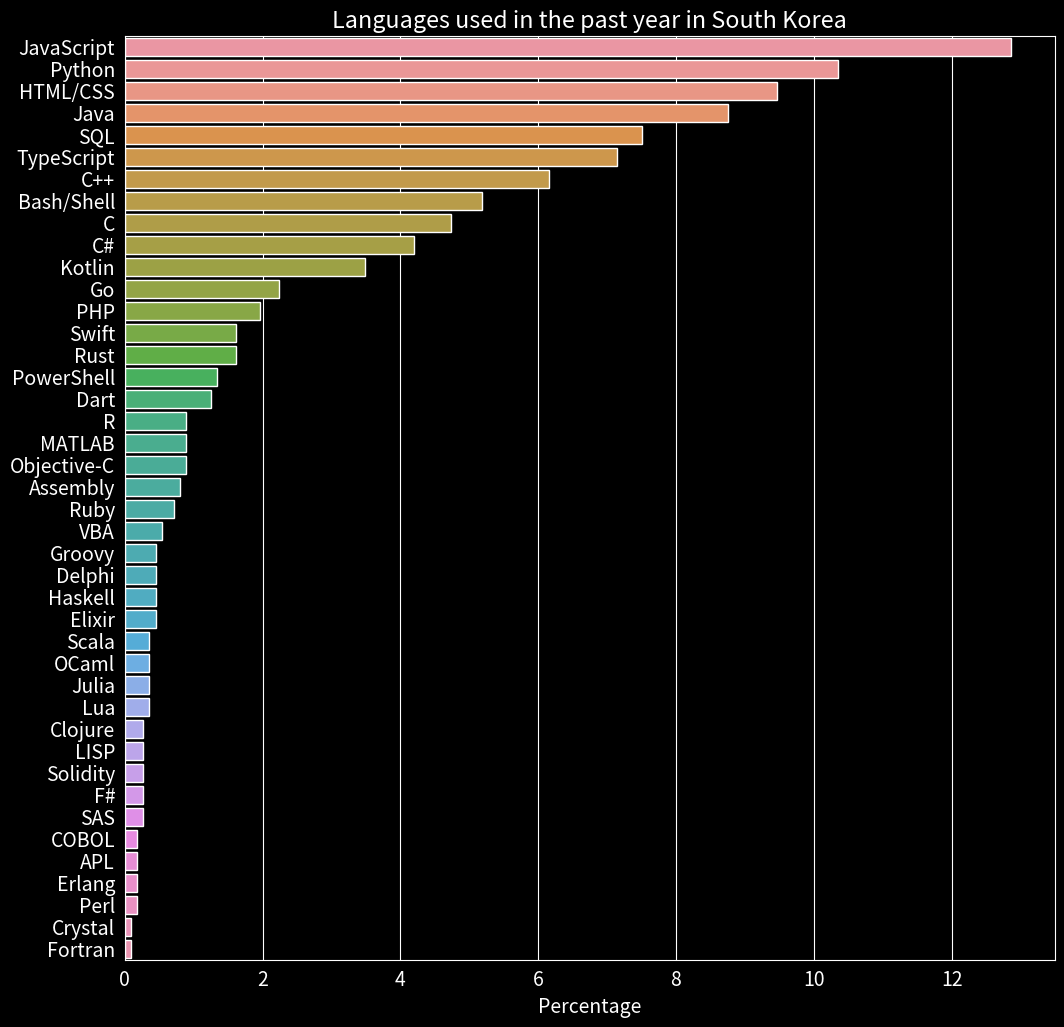

In [151]:
k=survey_df.loc[survey_df['Country'] == 'South Korea']
k.LanguageHaveWorkedWith
k_lan_df=split_multicolumn(k['LanguageHaveWorkedWith'])

k_lan_df.sum().sort_values(ascending=False)

k_lan_amount = k_lan_df.sum().sort_values(ascending=False)
k_lan_total = k_lan_amount.values.sum()
k_lan_percentage = (k_lan_amount/k_lan_total)*100

y = k_lan_percentage.index

plt.figure(figsize=(12,12))
plt.title('Languages used in the past year in South Korea')  # 이거 쓰셔야되요 틀렸습니다
plt.ylabel(None)
plt.xlabel('Percentage')
sns.barplot(x=k_lan_percentage, y=y)

plt.show()